# Time Series Analysis

## Introduction

* A time-series data is a series of data points or observations recorded at different or regular time intervals. In general, a time series is a sequence of data points taken at equally spaced time intervals. The frequency of recorded data points may be hourly, daily, weekly, monthly, quarterly or annually.
  
* Time-Series Forecasting is the process of using a statistical model to predict future values of a time-series based on past results.
  
* A time series analysis encompasses statistical methods for analyzing time series data. These methods enable us to extract meaningful statistics, patterns and other characteristics of the data. Time series are visualized with the help of line charts. So, time series analysis involves understanding inherent aspects of the time series data so that we can create meaningful and accurate forecasts.
  
* Applications of time series are used in statistics, finance or business applications. A very common example of time series data is the daily closing value of the stock index like NASDAQ or Dow Jones. Other common applications of time series are sales and demand forecasting, weather forecasting, econometrics, signal processing, pattern recognition and earthquake prediction.

## Components of Time Series

* **Trend** - The trend shows a general direction of the time series data over a long period of time. A trend can be increasing(upward), decreasing(downward), or horizontal(stationary).

* **Seasonality** - The seasonality component exhibits a trend that repeats with respect to timing, direction, and magnitude. Some examples include an increase in water consumption in summer due to hot weather conditions.

* **Cyclical Component** - These are the trends with no set repetition over a particular period of time. A cycle refers to the period of ups and downs, booms and slums of a time series, mostly observed in business cycles. These cycles do not exhibit a seasonal variation but generally occur over a time period of 3 to 12 years depending on the nature of the time series.
  
* **Irregular Variation** - These are the fluctuations in the time series data which become evident when trend and cyclical variations are removed. These variations are unpredictable, erratic, and may or may not be random.
  
* **ETS Decomposition** - ETS Decomposition is used to separate different components of a time series. The term ETS stands for Error, Trend and Seasonality.


## Types of data

* 1- Time series data - The observations of the values of a variable recorded at different points in time is called time series data.

* 2- Cross sectional data - It is the data of one or more variables recorded at the same point in time.

* 3- Pooled data- It is the combination of time series data and cross sectional data.

## Time Series terminology

* 1- Dependence- It refers to the association of two observations of the same variable at prior time periods.

* 2- Stationarity- It shows the mean value of the series that remains constant over the time period. If past effects accumulate and the values increase towards infinity then stationarity is not met.

* 3- Differencing- Differencing is used to make the series stationary and to control the auto-correlations. There may be some cases in time series analyses where we do not require differencing and over-differenced series can produce wrong estimates.

* 4- Specification - It may involve the testing of the linear or non-linear relationships of dependent variables by using time series models such as ARIMA models.

* 5- Exponential Smoothing - Exponential smoothing in time series analysis predicts the one next period value based on the past and current value. It involves averaging of data such that the non-systematic components of each individual case or observation cancel out each other. The exponential smoothing method is used to predict the short term prediction.

* 6- Curve fitting - Curve fitting regression in time series analysis is used when data is in a non-linear relationship.

* 7- ARIMA - ARIMA stands for Auto Regressive Integrated Moving Average.



### Modeling


#### Import the relevant libraries dataset 

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

In [63]:
from statsmodels.tsa.seasonal import seasonal_decompose

#### Import the data set

In [64]:
df = pd.read_csv('/Users/adel/Desktop/Masters Thesis/Cleaned_data1_2005-2016.csv')

In [65]:
df['date'].unique()

array(['2005-01-31', '2005-02-28', '2005-03-31', '2005-04-29',
       '2005-05-31', '2005-06-30', '2005-07-29', '2005-08-31',
       '2005-09-30', '2005-10-31', '2005-11-30', '2005-12-30',
       '2006-01-31', '2006-02-28', '2006-03-31', '2006-04-28',
       '2006-05-31', '2006-06-30', '2006-07-31', '2006-08-31',
       '2006-09-29', '2006-10-31', '2006-11-30', '2006-12-29',
       '2007-01-31', '2007-02-28', '2007-03-30', '2007-04-30',
       '2007-05-31', '2007-06-29', '2007-07-31', '2007-08-31',
       '2007-09-28', '2007-10-31', '2007-11-30', '2007-12-31',
       '2008-01-31', '2008-02-29', '2008-03-31', '2008-04-30',
       '2008-05-30', '2008-06-30', '2008-07-31', '2008-08-29',
       '2008-09-30', '2008-10-31', '2008-11-28', '2008-12-31',
       '2009-01-30', '2009-02-27', '2009-03-31', '2009-04-30',
       '2009-05-29', '2009-06-30', '2009-07-31', '2009-08-31',
       '2009-09-30', '2009-10-30', '2009-11-30', '2009-12-31',
       '2010-01-29', '2010-02-26', '2010-03-31', '2010-

For some simplicity, I will be working with monthly data for year 2016


#### Filter to subset the monthly data of year 2005 till 2016 for only one permno 14593 (Apple stock) - To make it Time Series Analysis


In [66]:
#Filter date of 2016
df_a = df[(df['date'] >= '2005-01-31') & (df['permno'] == 14593)].reset_index()

In [67]:
df_a = df_a .drop(columns = 'index', axis = 1)

In [68]:
df_a['date'] = pd.to_datetime(df_a['date'])

In [69]:
df_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 97 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             144 non-null    datetime64[ns]
 1   permno           144 non-null    int64         
 2   mvel1            144 non-null    float64       
 3   beta             144 non-null    float64       
 4   betasq           144 non-null    float64       
 5   chmom            144 non-null    float64       
 6   dolvol           144 non-null    float64       
 7   idiovol          144 non-null    float64       
 8   indmom           144 non-null    float64       
 9   mom1m            144 non-null    float64       
 10  mom6m            144 non-null    float64       
 11  mom12m           144 non-null    float64       
 12  mom36m           144 non-null    float64       
 13  pricedelay       144 non-null    float64       
 14  turn             144 non-null    float64  

In [70]:
df_a.describe()

,date,permno,mvel1,beta,betasq,chmom,dolvol,idiovol,indmom,mom1m,...,stdcf,ms,baspread,ill,maxret,retvol,std_dolvol,std_turn,zerotrade,sic2
count,144,144.0,1.440000e+02,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,...,144.000000,144.000000,144.000000,1.440000e+02,144.000000,144.000000,144.000000,144.000000,1.440000e+02,144.0
mean,2011-01-14 04:50:00,14593.0,6.852298e+07,1.030130,1.092387,-0.026049,18.443037,0.041641,0.081623,0.027318,...,0.075021,6.791667,0.024975,4.511761e-12,0.042789,0.019647,0.312893,8.324922,5.975181e-09,36.0
min,2005-01-31 00:00:00,14593.0,2.605296e+07,0.800021,0.640033,-1.556082,17.773427,0.029386,-0.546792,-0.329558,...,0.050277,5.000000,0.009523,8.040933e-13,0.008735,0.005605,0.138438,0.989659,1.141979e-09,36.0
25%,2008-01-23 06:00:00,14593.0,5.211757e+07,0.878168,0.771180,-0.288774,18.343990,0.033162,-0.086867,-0.027320,...,0.060282,7.000000,0.017494,1.692580e-12,0.026850,0.013972,0.246845,4.040683,3.006795e-09,36.0
50%,2011-01-15 12:00:00,14593.0,6.034831e+07,0.990620,0.981329,-0.027162,18.491718,0.041683,0.042114,0.029116,...,0.069309,7.000000,0.022486,2.440415e-12,0.038200,0.017560,0.306234,6.617363,4.467335e-09,36.0
75%,2014-01-07 18:00:00,14593.0,9.344253e+07,1.137487,1.293877,0.264895,18.607014,0.050462,0.235282,0.087794,...,0.094377,7.000000,0.028876,4.860784e-12,0.053810,0.023390,0.368751,11.479835,7.814800e-09,36.0
max,2016-12-30 00:00:00,14593.0,1.221146e+08,1.491647,2.225011,1.356630,19.005680,0.053515,1.089895,0.237701,...,0.107345,7.000000,0.094985,2.523791e-11,0.139050,0.060695,0.545770,32.654064,1.718753e-08,36.0
std,NaN,0.0,2.540036e+07,0.177304,0.387111,0.500390,0.253894,0.008785,0.290205,0.095472,...,0.018961,0.456116,0.011307,4.760506e-12,0.022431,0.008824,0.086683,5.884981,3.899995e-09,0.0


### Investigating trends

#### Visual Inspection
Plot the time series data to visually inspect for any obvious trends in mom1m - One-month price momentum

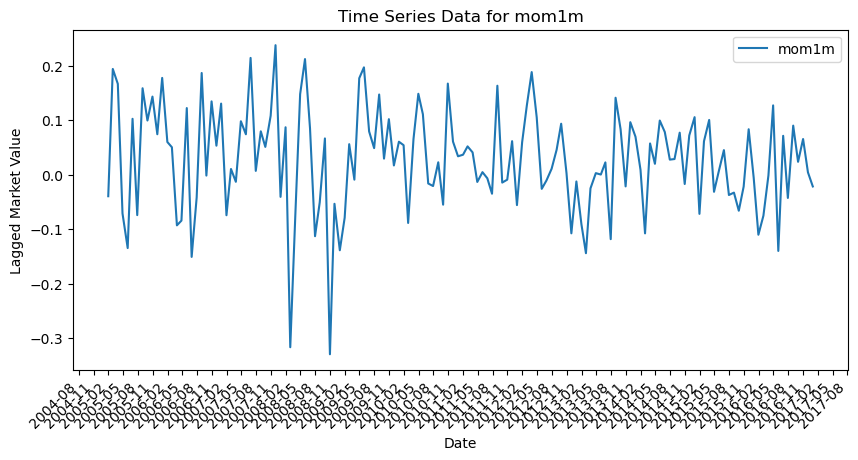

In [71]:
# Plot the time series
plt.figure(figsize=(10, 5))
plt.plot(df_a['date'], df_a['mom1m'], label='mom1m')

# Set the title and labels
plt.title('Time Series Data for mom1m')
plt.xlabel('Date')
plt.ylabel('Lagged Market Value')

# Format the x-axis dates
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # Major ticks every 2 months
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Date format

# Rotate the x-axis labels
plt.gcf().autofmt_xdate(rotation=45)

# Show legend
plt.legend()

# Show the plot
plt.show()

#### This dataset doesn't have a variable for the Returns of the stock, therefore, I am going to feauture engineer it from the mom1m variable

In [72]:
df_a.head()

,date,permno,mvel1,beta,betasq,chmom,dolvol,idiovol,indmom,mom1m,...,stdcf,ms,baspread,ill,maxret,retvol,std_dolvol,std_turn,zerotrade,sic2
0,2005-01-31,14593,2.605296e+07,1.074380,1.154292,0.456407,17.823801,0.049854,0.034932,-0.039523,...,0.053871,5.0,0.030293,1.742498e-11,0.049458,0.022822,0.495104,14.544308,2.775202e-09,36.0
1,2005-02-28,14593,3.142026e+07,1.063392,1.130804,0.944350,17.857665,0.049748,-0.003124,0.194099,...,0.053871,5.0,0.034710,1.023267e-11,0.072812,0.028358,0.514632,32.654064,1.928383e-09,36.0
2,2005-03-31,14593,3.665834e+07,0.989959,0.980018,1.159444,17.867732,0.050483,-0.057988,0.166710,...,0.053871,5.0,0.028961,1.170177e-11,0.044665,0.022854,0.422850,19.178120,2.445904e-09,36.0
3,2005-04-29,14593,3.430012e+07,0.992672,0.985398,0.717648,17.802240,0.050452,-0.048947,-0.071110,...,0.060945,6.0,0.028847,1.609371e-11,0.025983,0.022650,0.390455,12.725059,3.095849e-09,36.0
4,2005-05-31,14593,2.971106e+07,0.981289,0.962929,-0.656248,17.922735,0.051005,-0.036217,-0.134629,...,0.060945,6.0,0.040809,2.275164e-11,0.047029,0.035998,0.425747,23.182671,2.458113e-09,36.0


mom1m is the momentum calculated as the percentage change in stock prices over one month, therefore, if I shift this variable one month into the future, I will be able to calaculate the stock return

In [73]:
# Shift the mom1m values one month into the future to get returns
df_a['return'] = df_a['mom1m'].shift(-1)

In [74]:
df_a = df_a.dropna()

In [75]:
df_a

,date,permno,mvel1,beta,betasq,chmom,dolvol,idiovol,indmom,mom1m,...,ms,baspread,ill,maxret,retvol,std_dolvol,std_turn,zerotrade,sic2,return
0,2005-01-31,14593,2.605296e+07,1.074380,1.154292,0.456407,17.823801,0.049854,0.034932,-0.039523,...,5.0,0.030293,1.742498e-11,0.049458,0.022822,0.495104,14.544308,2.775202e-09,36.0,0.194099
1,2005-02-28,14593,3.142026e+07,1.063392,1.130804,0.944350,17.857665,0.049748,-0.003124,0.194099,...,5.0,0.034710,1.023267e-11,0.072812,0.028358,0.514632,32.654064,1.928383e-09,36.0,0.166710
2,2005-03-31,14593,3.665834e+07,0.989959,0.980018,1.159444,17.867732,0.050483,-0.057988,0.166710,...,5.0,0.028961,1.170177e-11,0.044665,0.022854,0.422850,19.178120,2.445904e-09,36.0,-0.071110
3,2005-04-29,14593,3.430012e+07,0.992672,0.985398,0.717648,17.802240,0.050452,-0.048947,-0.071110,...,6.0,0.028847,1.609371e-11,0.025983,0.022650,0.390455,12.725059,3.095849e-09,36.0,-0.134629
4,2005-05-31,14593,2.971106e+07,0.981289,0.962929,-0.656248,17.922735,0.051005,-0.036217,-0.134629,...,6.0,0.040809,2.275164e-11,0.047029,0.035998,0.425747,23.182671,2.458113e-09,36.0,0.102587
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,2016-07-29,14593,1.139451e+08,0.882594,0.778973,0.071521,18.565780,0.031613,-0.089878,-0.042660,...,7.0,0.015585,2.439576e-12,0.016840,0.011522,0.283849,2.308352,1.388174e-08,36.0,0.090063
139,2016-08-31,14593,1.221146e+08,0.881796,0.777565,0.272761,18.685227,0.030311,-0.046784,0.090063,...,7.0,0.011765,2.247362e-12,0.064963,0.016383,0.344536,2.931963,1.718753e-08,36.0,0.023606
140,2016-09-30,14593,1.212785e+08,0.906031,0.820893,0.243628,18.492052,0.029704,0.102354,0.023606,...,7.0,0.010746,2.042421e-12,0.017657,0.008186,0.178318,0.989659,1.621075e-08,36.0,0.065504
141,2016-10-31,14593,1.193993e+08,0.942825,0.888919,0.050972,18.518768,0.029699,0.177388,0.065504,...,7.0,0.017524,2.280951e-12,0.035387,0.016624,0.428328,4.282073,1.157182e-08,36.0,0.004334


#### Visual Inspection
Plot the time series data to visually inspect for any obvious trends in apple stock returns

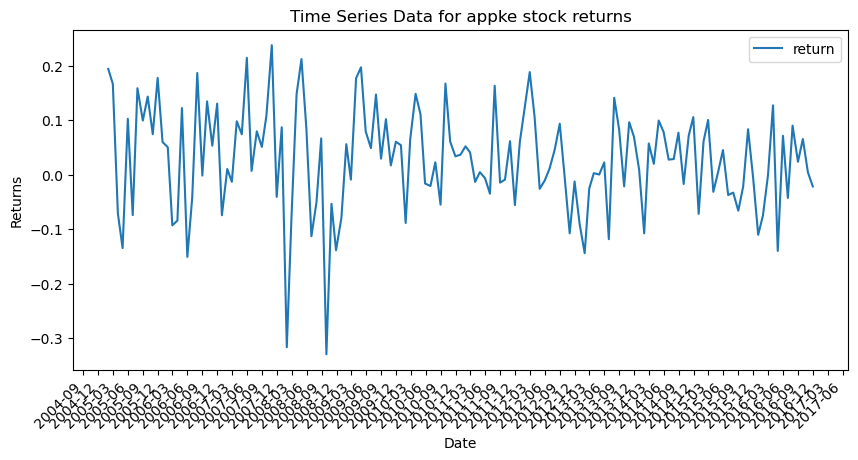

In [76]:
# Plot the time series
plt.figure(figsize=(10, 5))
plt.plot(df_a['date'], df_a['return'], label='return')

# Set the title and labels
plt.title('Time Series Data for appke stock returns')
plt.xlabel('Date')
plt.ylabel('Returns')

# Format the x-axis dates
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # Major ticks every 2 months
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Date format

# Rotate the x-axis labels
plt.gcf().autofmt_xdate(rotation=45)

# Show legend
plt.legend()

# Show the plot
plt.show()

It looks like the returns of appke stock shows Irregularity - Unexpected situations/events/scenarios and spikes in a short time span.

#### Perform Time Series Decomposition
Use the seasonal_decompose function from the statsmodels library to decompose the time series.

In [77]:
# Set the date column as the index
df_a.set_index('date', inplace=True)

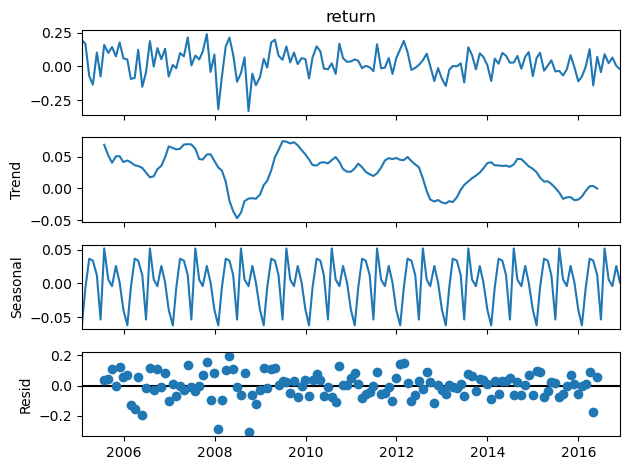

In [78]:
# Perform seasonal decomposition
decomposition = seasonal_decompose(df_a['return'], model='additive', period=12)  #Monthly data with yearly seasonality: period=12

# Plot the decomposed components
decomposition.plot()
plt.show()

1. Trend Component
Insights:
Long-Term Movement: The trend component shows the long-term progression of the time series. It helps identify whether the overall direction is upward, downward, or stable over time.
Growth Rates: By examining the slope of the trend, you can estimate the rate of growth or decline.
Turning Points: Detecting when the trend changes direction can indicate significant shifts in the underlying process.

2. Seasonal Component
Insights:
Repetitive Patterns: The seasonal component captures regular patterns that repeat over a fixed period, such as daily, weekly, monthly, or yearly cycles.
Seasonal Effects: Understanding seasonal effects can help in planning and adjusting strategies to capitalize on expected fluctuations.
Anomalies: Comparing observed data with seasonal patterns can help identify anomalies or unusual events that deviate from expected seasonal behavior.

3. Residual Component
Insights:
Irregularities: The residual component represents the irregular or random fluctuations that are not explained by the trend or seasonal components.
Outliers and Anomalies: Large residuals can indicate outliers or unusual events that warrant further investigation.
Model Adequacy: Analyzing the residuals can help assess the adequacy of the model. Residuals should ideally resemble white noise (random with no discernible pattern).

####  Summary Statistics
Compare summary statistics, such as mean and variance, over different time intervals. A stationary series should have roughly constant mean and variance over time./

In [98]:
print(df_a['return'].rolling(window=30).mean().dropna().head(10))
print(df_a['return'].rolling(window=30).std().dropna().head(10))


date
2007-06-29    0.050648
2007-07-31    0.046833
2007-08-31    0.042976
2007-09-28    0.048955
2007-10-31    0.061366
2007-11-30    0.056590
2007-12-31    0.061964
2008-01-31    0.046120
2008-02-29    0.040260
2008-03-31    0.040410
Name: return, dtype: float64
date
2007-06-29    0.105285
2007-07-31    0.101928
2007-08-31    0.099393
2007-09-28    0.097674
2007-10-31    0.097196
2007-11-30    0.098611
2007-12-31    0.095585
2008-01-31    0.116178
2008-02-29    0.117819
2008-03-31    0.117958
Name: return, dtype: float64


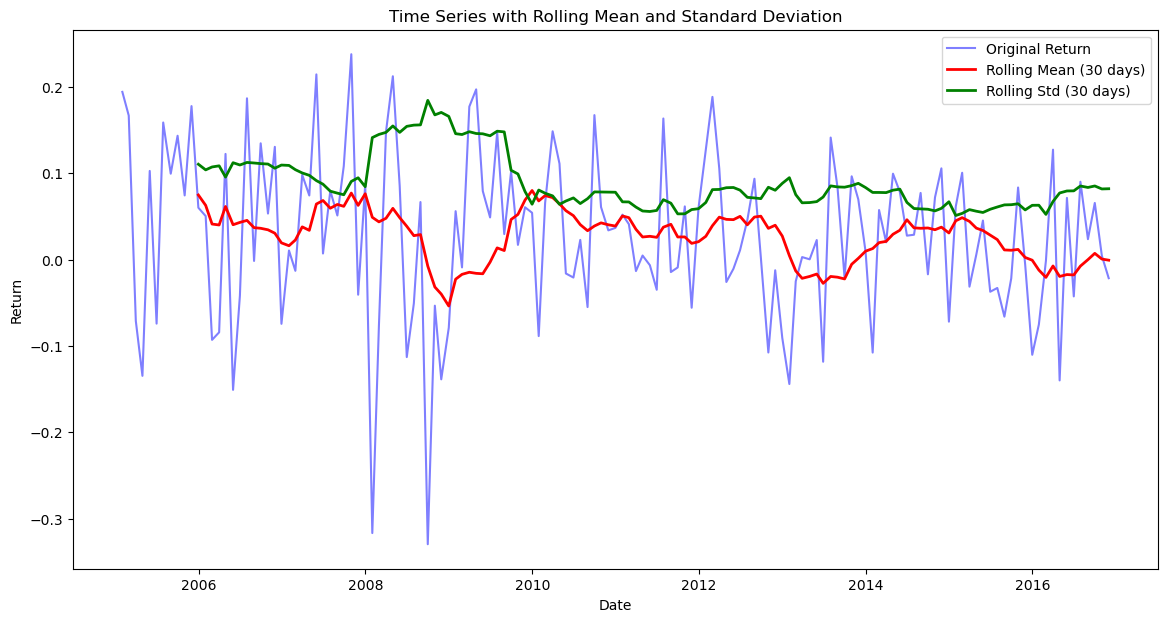

In [97]:
# Calculate rolling mean and standard deviation
window_size = 30
rolling_mean = df_a['return'].rolling(window=window_size).mean().dropna()
rolling_std = df_a['return'].rolling(window=window_size).std().dropna()


# Plot the original time series, rolling mean, and rolling standard deviation
plt.figure(figsize=(14, 7))

# Plot original time series
plt.plot(df_a.index, df_a['return'], label='Original Return', color='blue', alpha=0.5)

# Plot rolling mean
plt.plot(rolling_mean, label='Rolling Mean (30 days)', color='red', linewidth=2)

# Plot rolling standard deviation
plt.plot(rolling_std, label='Rolling Std (30 days)', color='green', linewidth=2)

# Adding titles and labels
plt.title('Time Series with Rolling Mean and Standard Deviation')
plt.xlabel('Date')
plt.ylabel('Return')
plt.legend()

# Display the plot
plt.show()

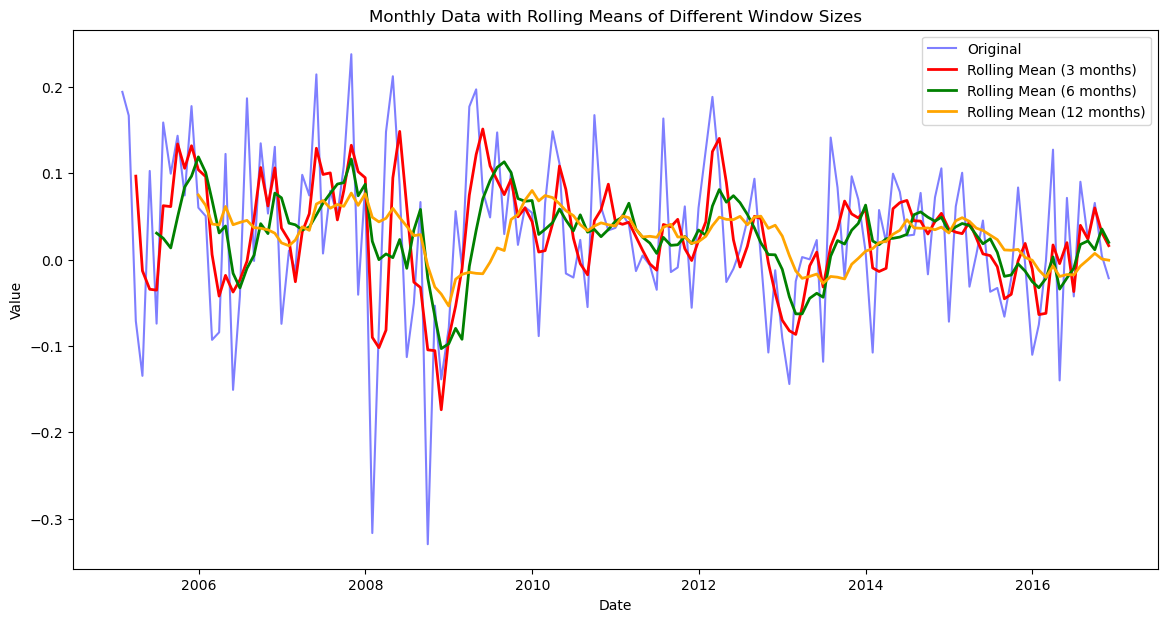

In [99]:
# Calculate rolling mean with different window sizes
rolling_mean_3 = df_a['return'].rolling(window=3).mean()
rolling_mean_6 = df_a['return'].rolling(window=6).mean()
rolling_mean_12 = df_a['return'].rolling(window=12).mean()

# Plot the original time series and rolling means
plt.figure(figsize=(14, 7))

# Plot original time series
plt.plot(df_a.index, df_a['return'], label='Original', color='blue', alpha=0.5)

# Plot rolling means
plt.plot(rolling_mean_3, label='Rolling Mean (3 months)', color='red', linewidth=2)
plt.plot(rolling_mean_6, label='Rolling Mean (6 months)', color='green', linewidth=2)
plt.plot(rolling_mean_12, label='Rolling Mean (12 months)', color='orange', linewidth=2)

# Adding titles and labels
plt.title('Monthly Data with Rolling Means of Different Window Sizes')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()

# Display the plot
plt.show()

All the follwoing rolling means for different window size shows that there is no constant mean or variance across different time spans, this shows that the data I have is most likley to be considered as non-stationary time series

#### Augmented Dickey-Fuller (ADF) Test
The ADF test is a common statistical test used to check for stationarity. It tests the null hypothesis that a unit root is present in the time series (i.e., the series is non-stationary).

In [100]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df_a['return'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

for key, value in result[4].items():
    print('Critical Value ({}): {}'.format(key, value))

ADF Statistic: -10.661413469020774
p-value: 4.397385936301459e-19
Critical Value (1%): -3.477261624048995
Critical Value (5%): -2.8821181874544233
Critical Value (10%): -2.5777431104939494


Summary:

* ADF Statistic: -10.661413469020774 (highly negative)

* p-value: 4.397385936301459e-19 (very close to 0)

* Critical Values: -3.477 (1%), -2.882 (5%), -2.577 (10%)
                           
**Conclusion:** The test provides strong evidence to reject the null hypothesis of a unit root, indicating that the time series is stationary.
This means that the statistical properties of the time series (such as mean, variance) do not change over time, making it suitable for time series analysis and forecasting without needing further differencing to achieve stationarity.

#### KPSS (Kwiatkowski-Phillips-Schmidt-Shin) test
The KPSS (Kwiatkowski-Phillips-Schmidt-Shin) test is another statistical test used to check the stationarity of a time series. Unlike the ADF test, which has the null hypothesis that the time series is non-stationary (has a unit root), the KPSS test has the null hypothesis that the time series is stationary around a deterministic trend.

In [102]:
from statsmodels.tsa.stattools import kpss
# Perform KPSS test
result_kpss = kpss(df_a['return'], regression='c', nlags="auto")

# Print the KPSS test results
print('KPSS Statistic:', result_kpss[0])
print('p-value:', result_kpss[1])
for key, value in result_kpss[3].items():
    print('Critical Value ({}): {}'.format(key, value))

KPSS Statistic: 0.2333009813364031
p-value: 0.1
Critical Value (10%): 0.347
Critical Value (5%): 0.463
Critical Value (2.5%): 0.574
Critical Value (1%): 0.739


/var/folders/y2/nn4ysj1j0vjgh4j8xg9_nbl00000gq/T/ipykernel_91165/788887698.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result_kpss = kpss(df_a['return'], regression='c', nlags="auto")


Summary:

* KPSS Statistic: 0.2333009813364031 (less than all critical values)
  
* p-value: 0.1 (greater than 0.05 and 0.10 significance levels)

  
**Conclusion:** The KPSS statistic is lower than the critical values, and the p-value is relatively high. Therefore, we fail to reject the null hypothesis that the time series is stationary.
This means that, based on the KPSS test results, the time series is considered to be stationary around a constant mean. It indicates that the statistical properties of the time series (such as mean and variance) do not change over time.

## Conclusion

Both tests conclude that the given series is stationary – The series is stationary
